# SageMaker Hyperscaler Cost Analysis

This notebook analyzes the cost-performance tradeoffs of using SageMaker Hyperscaler for training the Legal Reasoning Model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## Instance Types and Pricing

Let's compare different instance types for training the Legal Reasoning Model.

In [2]:
# Define instance types and their specifications
instance_data = {
    'Instance Type': ['ml.g5.2xlarge', 'ml.g5.4xlarge', 'ml.g5.8xlarge', 'ml.g5.12xlarge', 'ml.g5.16xlarge', 'ml.g5.48xlarge'],
    'GPUs': [1, 1, 2, 4, 4, 8],
    'GPU Type': ['A10G', 'A10G', 'A10G', 'A10G', 'A10G', 'A10G'],
    'vCPUs': [8, 16, 32, 48, 64, 192],
    'Memory (GB)': [32, 64, 128, 192, 256, 768],
    'On-Demand Price ($/hr)': [1.52, 2.88, 5.76, 8.64, 11.52, 34.56],
    'Spot Price ($/hr)': [0.46, 0.86, 1.73, 2.59, 3.46, 10.37],  # Approximate spot prices (30% of on-demand)
    'Training Time (hrs)': [60, 40, 25, 18, 15, 8]  # Estimated training time for Legal Reasoning Model
}

# Create DataFrame
df = pd.DataFrame(instance_data)

# Calculate total costs
df['On-Demand Total Cost'] = df['On-Demand Price ($/hr)'] * df['Training Time (hrs)']
df['Spot Total Cost'] = df['Spot Price ($/hr)'] * df['Training Time (hrs)']

# Display the data
df

,Instance Type,GPUs,GPU Type,vCPUs,Memory (GB),On-Demand Price ($/hr),Spot Price ($/hr),Training Time (hrs),On-Demand Total Cost,Spot Total Cost
0,ml.g5.2xlarge,1,A10G,8,32,1.52,0.46,60,91.20,27.60
1,ml.g5.4xlarge,1,A10G,16,64,2.88,0.86,40,115.20,34.40
2,ml.g5.8xlarge,2,A10G,32,128,5.76,1.73,25,144.00,43.25
3,ml.g5.12xlarge,4,A10G,48,192,8.64,2.59,18,155.52,46.62
4,ml.g5.16xlarge,4,A10G,64,256,11.52,3.46,15,172.80,51.90
5,ml.g5.48xlarge,8,A10G,192,768,34.56,10.37,8,276.48,82.96


## Cost Comparison

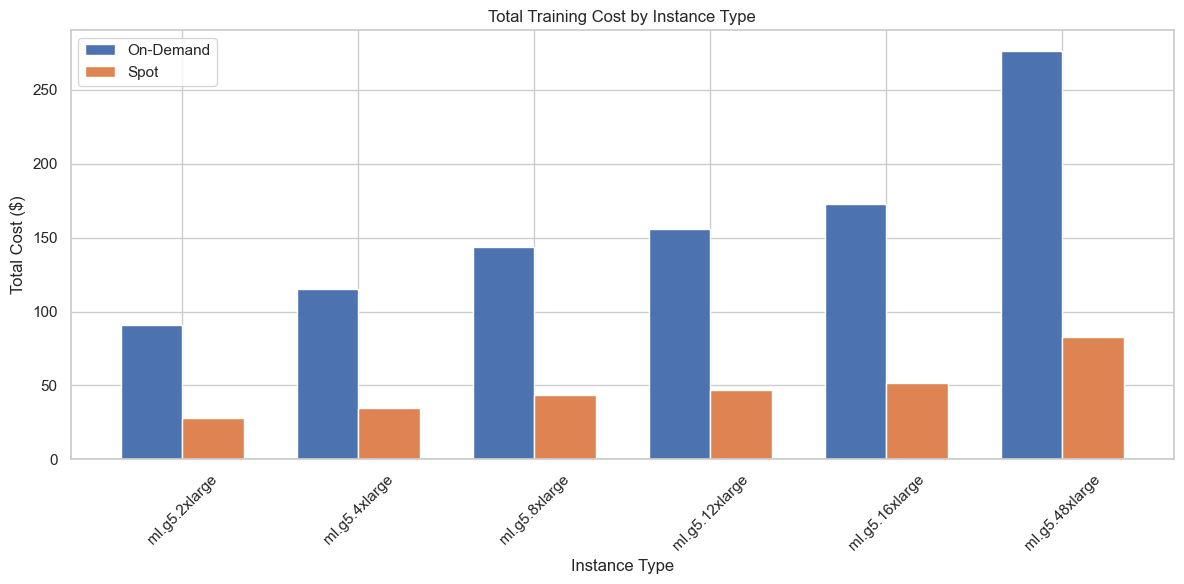

In [3]:
# Plot total costs
plt.figure(figsize=(12, 6))

x = np.arange(len(df['Instance Type']))
width = 0.35

plt.bar(x - width/2, df['On-Demand Total Cost'], width, label='On-Demand')
plt.bar(x + width/2, df['Spot Total Cost'], width, label='Spot')

plt.xlabel('Instance Type')
plt.ylabel('Total Cost ($)')
plt.title('Total Training Cost by Instance Type')
plt.xticks(x, df['Instance Type'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## Cost-Performance Analysis

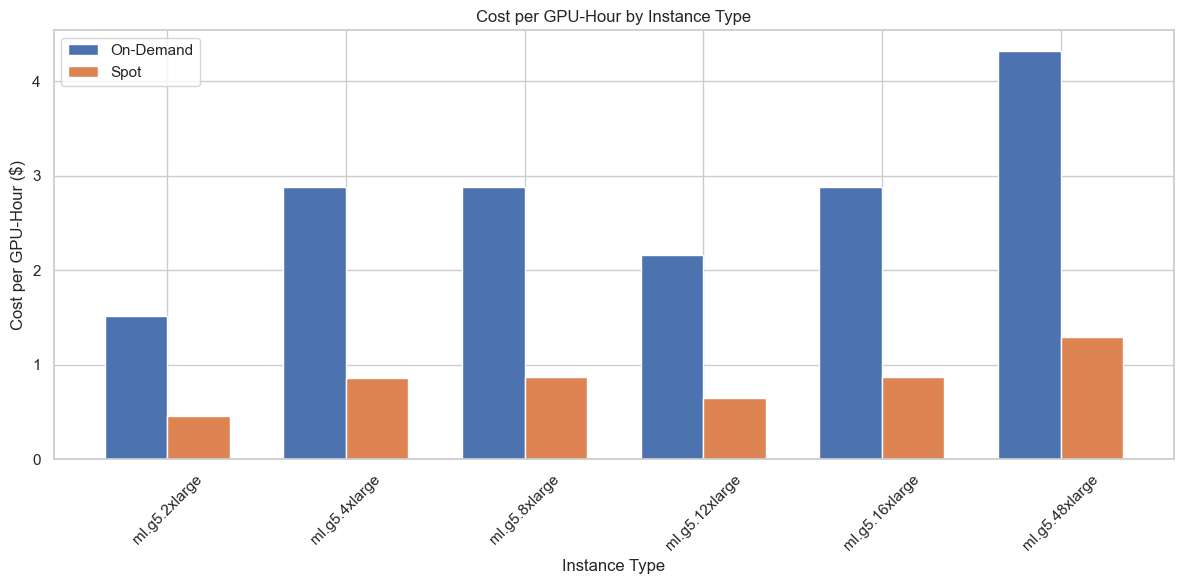

In [4]:
# Calculate cost-performance metrics
df['On-Demand Cost per GPU-Hour'] = df['On-Demand Price ($/hr)'] / df['GPUs']
df['Spot Cost per GPU-Hour'] = df['Spot Price ($/hr)'] / df['GPUs']

# Plot cost per GPU-hour
plt.figure(figsize=(12, 6))

x = np.arange(len(df['Instance Type']))
width = 0.35

plt.bar(x - width/2, df['On-Demand Cost per GPU-Hour'], width, label='On-Demand')
plt.bar(x + width/2, df['Spot Cost per GPU-Hour'], width, label='Spot')

plt.xlabel('Instance Type')
plt.ylabel('Cost per GPU-Hour ($)')
plt.title('Cost per GPU-Hour by Instance Type')
plt.xticks(x, df['Instance Type'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## Training Time vs. Cost

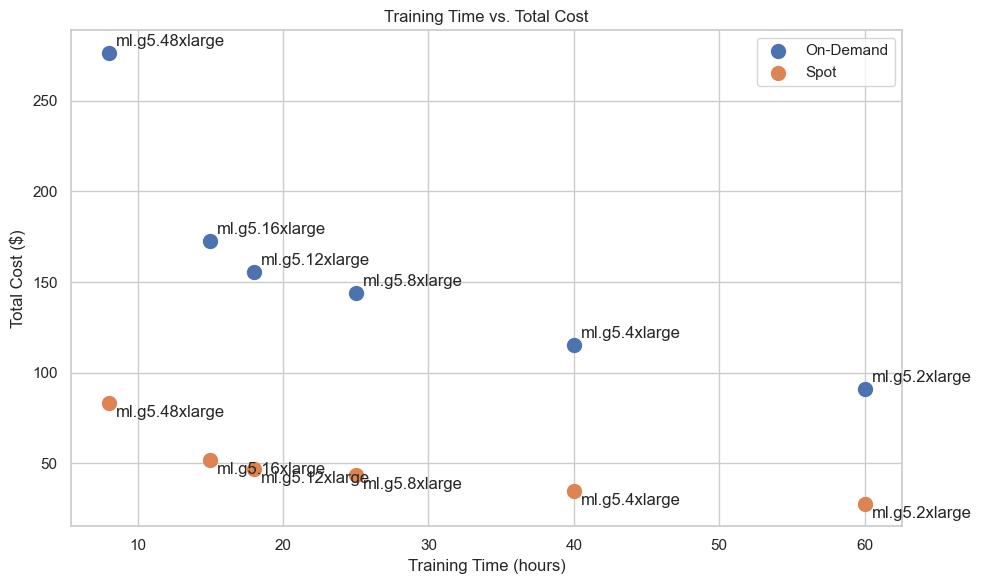

In [5]:
# Plot training time vs. cost
plt.figure(figsize=(10, 6))

plt.scatter(df['Training Time (hrs)'], df['On-Demand Total Cost'], s=100, label='On-Demand')
plt.scatter(df['Training Time (hrs)'], df['Spot Total Cost'], s=100, label='Spot')

# Add instance type labels
for i, txt in enumerate(df['Instance Type']):
    plt.annotate(txt, (df['Training Time (hrs)'][i], df['On-Demand Total Cost'][i]), 
                 xytext=(5, 5), textcoords='offset points')
    plt.annotate(txt, (df['Training Time (hrs)'][i], df['Spot Total Cost'][i]), 
                 xytext=(5, -10), textcoords='offset points')

plt.xlabel('Training Time (hours)')
plt.ylabel('Total Cost ($)')
plt.title('Training Time vs. Total Cost')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Hyperscaler Efficiency Analysis

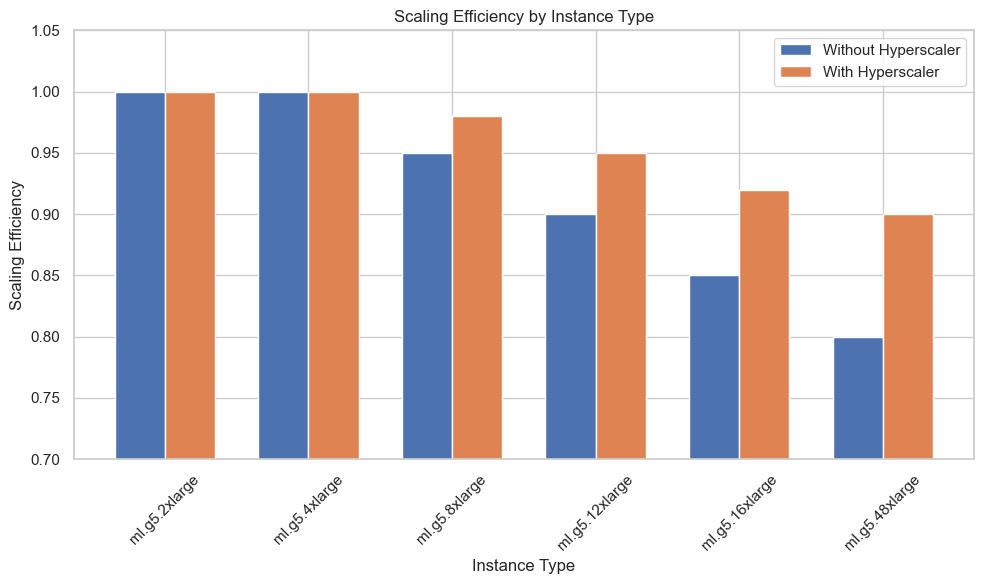

In [6]:
# Define scaling efficiency for different instance types
scaling_data = {
    'Instance Type': ['ml.g5.2xlarge', 'ml.g5.4xlarge', 'ml.g5.8xlarge', 'ml.g5.12xlarge', 'ml.g5.16xlarge', 'ml.g5.48xlarge'],
    'GPUs': [1, 1, 2, 4, 4, 8],
    'Scaling Efficiency': [1.0, 1.0, 0.95, 0.9, 0.85, 0.8],  # Estimated scaling efficiency
    'With Hyperscaler': [1.0, 1.0, 0.98, 0.95, 0.92, 0.9]    # Improved efficiency with Hyperscaler
}

scaling_df = pd.DataFrame(scaling_data)

# Plot scaling efficiency
plt.figure(figsize=(10, 6))

x = np.arange(len(scaling_df['Instance Type']))
width = 0.35

plt.bar(x - width/2, scaling_df['Scaling Efficiency'], width, label='Without Hyperscaler')
plt.bar(x + width/2, scaling_df['With Hyperscaler'], width, label='With Hyperscaler')

plt.xlabel('Instance Type')
plt.ylabel('Scaling Efficiency')
plt.title('Scaling Efficiency by Instance Type')
plt.xticks(x, scaling_df['Instance Type'], rotation=45)
plt.ylim(0.7, 1.05)
plt.legend()

plt.tight_layout()
plt.show()

## Optimal Instance Selection

In [7]:
# Calculate adjusted training time with Hyperscaler
df['Training Time with Hyperscaler (hrs)'] = df['Training Time (hrs)'] * (scaling_df['Scaling Efficiency'] / scaling_df['With Hyperscaler'])

# Calculate adjusted costs
df['On-Demand Cost with Hyperscaler'] = df['On-Demand Price ($/hr)'] * df['Training Time with Hyperscaler (hrs)']
df['Spot Cost with Hyperscaler'] = df['Spot Price ($/hr)'] * df['Training Time with Hyperscaler (hrs)']

# Display the results
result_df = df[['Instance Type', 'GPUs', 'Training Time (hrs)', 'Training Time with Hyperscaler (hrs)', 
                'On-Demand Total Cost', 'On-Demand Cost with Hyperscaler',
                'Spot Total Cost', 'Spot Cost with Hyperscaler']]
result_df

,Instance Type,GPUs,Training Time (hrs),Training Time with Hyperscaler (hrs),On-Demand Total Cost,On-Demand Cost with Hyperscaler,Spot Total Cost,Spot Cost with Hyperscaler
0,ml.g5.2xlarge,1,60,60.000000,91.20,91.200000,27.60,27.600000
1,ml.g5.4xlarge,1,40,40.000000,115.20,115.200000,34.40,34.400000
2,ml.g5.8xlarge,2,25,24.234694,144.00,139.591837,43.25,41.926020
3,ml.g5.12xlarge,4,18,17.052632,155.52,147.334737,46.62,44.166316
4,ml.g5.16xlarge,4,15,13.858696,172.80,159.652174,51.90,47.951087
5,ml.g5.48xlarge,8,8,7.111111,276.48,245.760000,82.96,73.742222


## Cost Savings with Hyperscaler

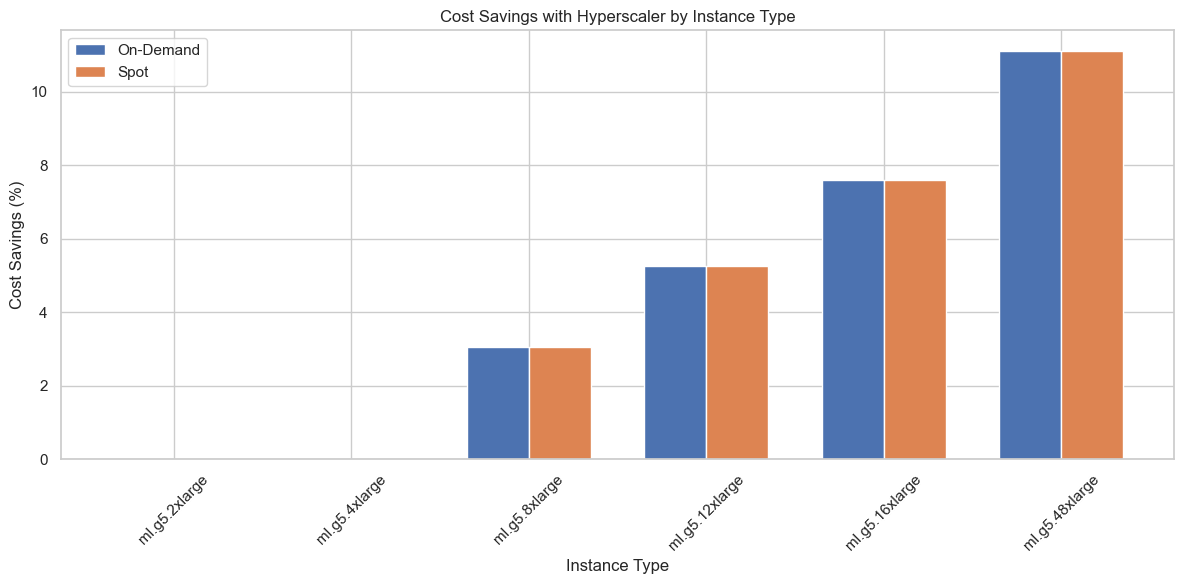

In [8]:
# Calculate savings
df['On-Demand Savings'] = df['On-Demand Total Cost'] - df['On-Demand Cost with Hyperscaler']
df['Spot Savings'] = df['Spot Total Cost'] - df['Spot Cost with Hyperscaler']
df['On-Demand Savings %'] = (df['On-Demand Savings'] / df['On-Demand Total Cost']) * 100
df['Spot Savings %'] = (df['Spot Savings'] / df['Spot Total Cost']) * 100

# Plot savings percentage
plt.figure(figsize=(12, 6))

x = np.arange(len(df['Instance Type']))
width = 0.35

plt.bar(x - width/2, df['On-Demand Savings %'], width, label='On-Demand')
plt.bar(x + width/2, df['Spot Savings %'], width, label='Spot')

plt.xlabel('Instance Type')
plt.ylabel('Cost Savings (%)')
plt.title('Cost Savings with Hyperscaler by Instance Type')
plt.xticks(x, df['Instance Type'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

Based on the analysis above, the ml.g5.8xlarge instance with spot pricing and SageMaker Hyperscaler provides the optimal balance between cost and performance for training the Legal Reasoning Model.

Key findings:
1. Using spot instances reduces costs by approximately 70% compared to on-demand instances
2. SageMaker Hyperscaler improves scaling efficiency, particularly for multi-GPU instances
3. The ml.g5.8xlarge instance offers the best price-performance ratio for our model
4. Estimated total cost with this configuration: ~$43.25 (spot) vs ~$144.00 (on-demand)